# Počítačový návrh léčiv, 3. cvičení
Jiří Reiniš

In [29]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Draw import IPythonConsole

In [6]:
suppl = Chem.SDMolSupplier("../../data/drugbank.sdf")
drugbank = [m for m in suppl if m]

#### Úkol 1: Pomocí SMARTS si nadefinujeme substrukturní klíč, který budeme aplikovat na celý drugbank.

In [7]:
substructures = {
    'COO': Chem.MolFromSmarts('C(=O)O'),
    'benzene': Chem.MolFromSmarts('c1ccccc1'),
    'N': Chem.MolFromSmarts('[#7]'),
    'halogen': Chem.MolFromSmarts('[F;C;Br;I]'),
    'triple_bond': Chem.MolFromSmarts('*#*'),
    'aliphatic': Chem.MolFromSmarts('C'),
    'S': Chem.MolFromSmarts('S'),
}
name_order = tuple(substructures.keys())

In [8]:
def apply_substr_key(m, name_order, pattern_dict):
    return tuple([m.HasSubstructMatch(pattern_dict[name]) for name in name_order])

*Do proměnné drugbank_search uložíme výsledek substrukturního hledání v celé drugbank*

In [9]:
drugbank_search  = [apply_substr_key(m, name_order, substructures) for m in drugbank]

*Nyní chceme pro každou substrukturu zjistit, kolik záznamů ji obsahuje.*

In [10]:
drugbank_sum = list(map(sum, zip(*drugbank_search)))

In [11]:
drugbank_sum

[2397, 4286, 5679, 0, 246, 6830, 1355]

#### Úkol 2: Najít záznamy v drugbank, které mají pro náš klíč stejný výsledek jako aspirin.

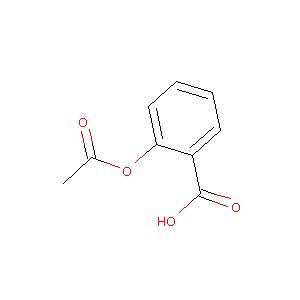

In [12]:
aspirin = Chem.MolFromSmiles("O=C(C)Oc1ccccc1C(=O)O")
Draw.MolToImage(aspirin)

In [13]:
aspirin_key = apply_substr_key(aspirin, name_order, substructures)
aspirin_key

(True, True, False, False, False, True, False)

In [14]:
aspirin_hits = [i for i, key in enumerate(drugbank_search) if key == aspirin_key]

In [15]:
len(aspirin_hits)

201

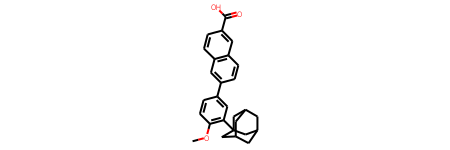

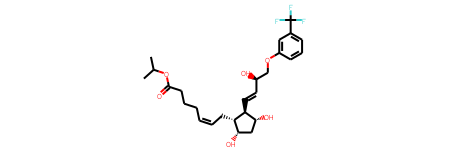

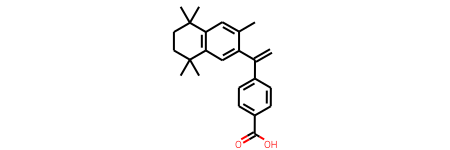

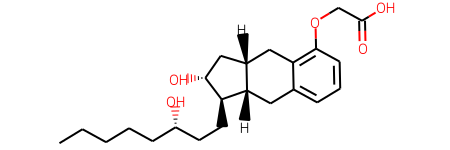

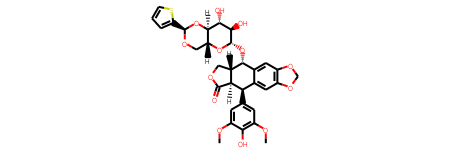

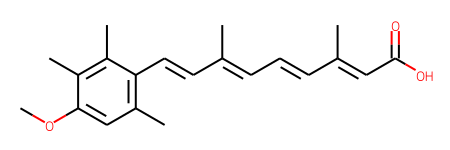

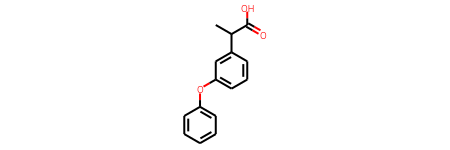

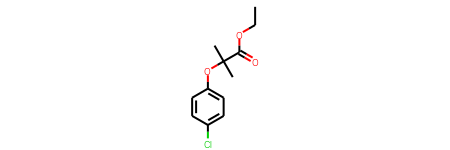

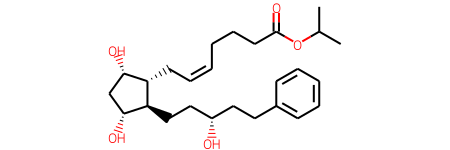

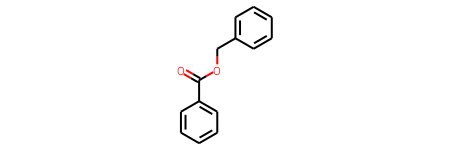

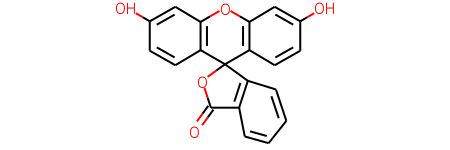

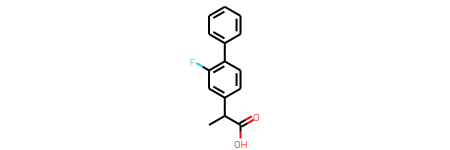

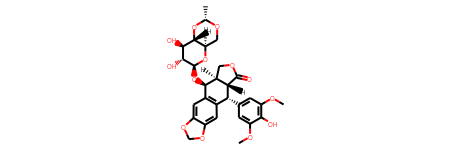

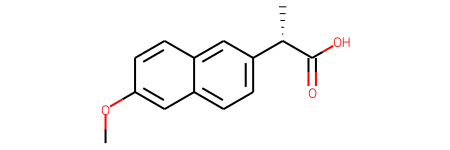

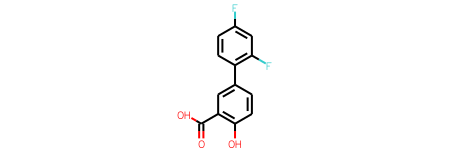

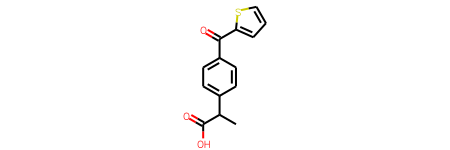

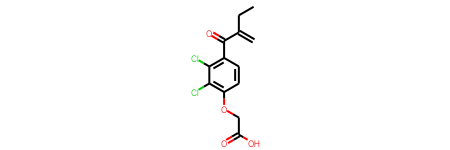

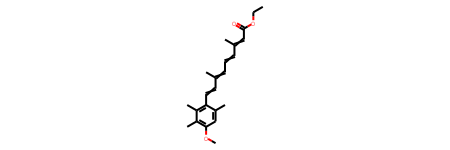

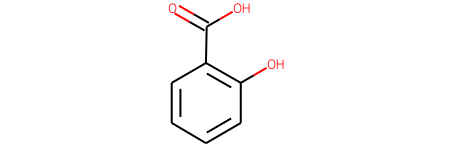

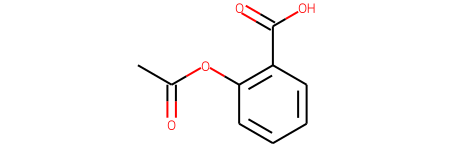

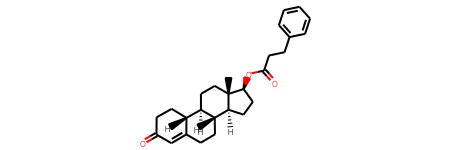

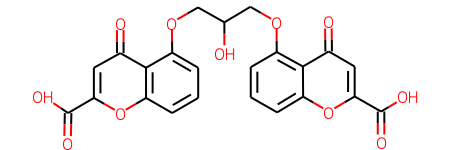

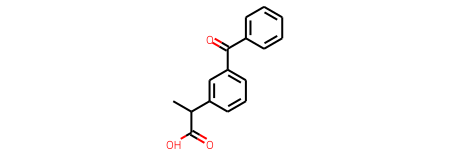

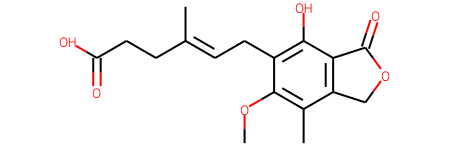

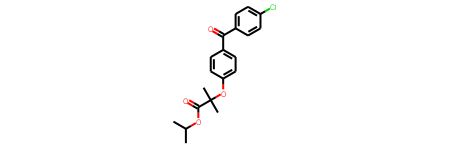

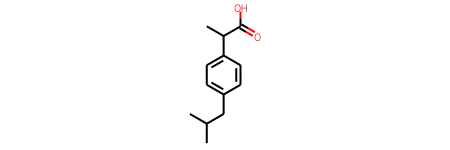

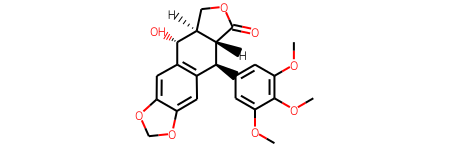

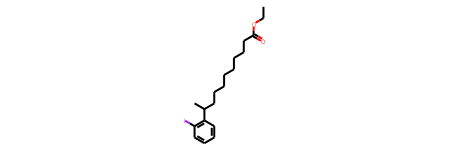

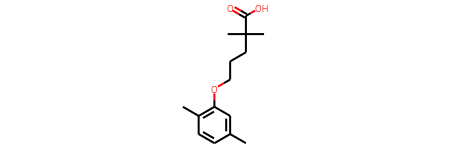

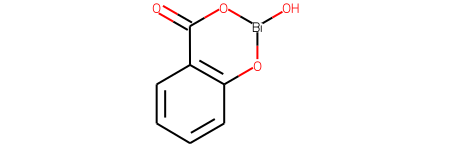

In [27]:
for i in aspirin_hits[:30]:
    display(drugbank[i])

In [16]:
def potential_superstructure(super_key, query_key):
    for s, q in zip(super_key, query_key):
        if q and not s:
            return False
        return True


#### Úkol 3: Nyní chceme dělat preprocessing k substrukturnímu hledání. Pokud aspirin bude obsahovat nějaký z definovaných znaků v klíči, superstruktura ho bude obsahovat taky.  TLDR: pokud ma nekde aspirin True, substruktura tam musi mit taky True

In [17]:
aspirin_potential_superstructures = [i for i, key in enumerate(drugbank_search) if potential_superstructure(key, aspirin_key)]

In [18]:
len(aspirin_potential_superstructures)

2397

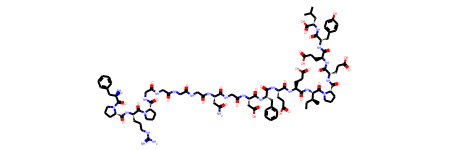

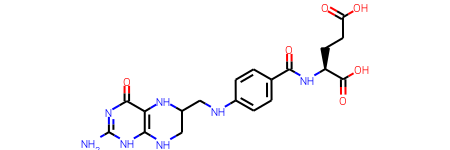

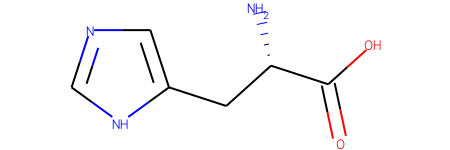

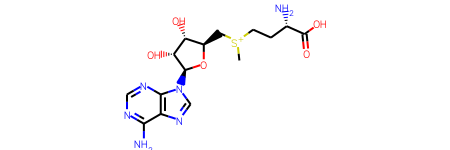

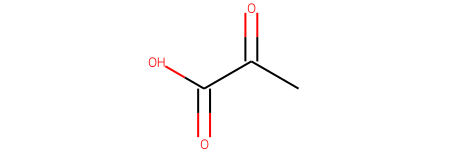

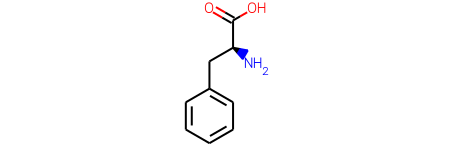

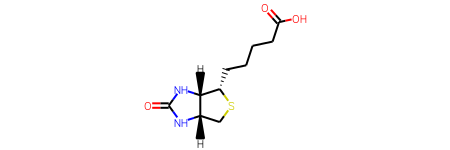

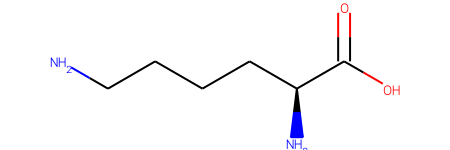

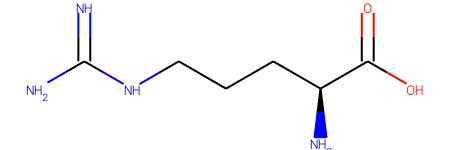

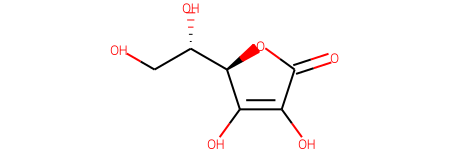

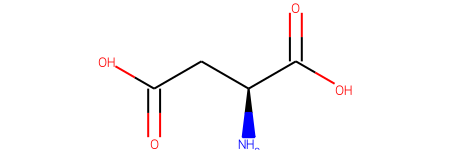

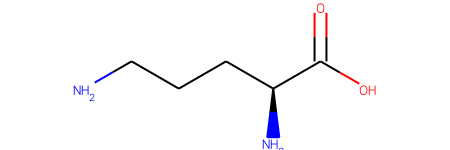

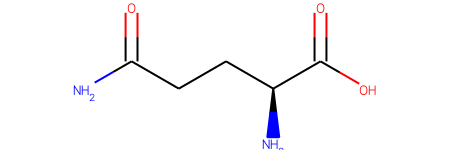

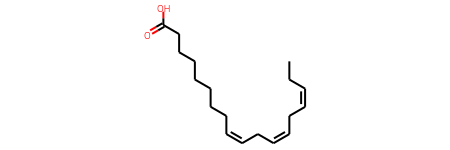

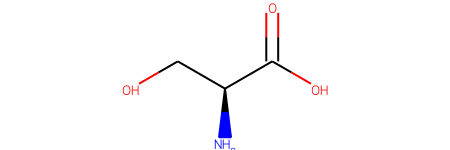

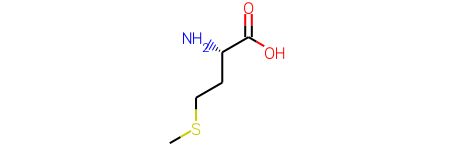

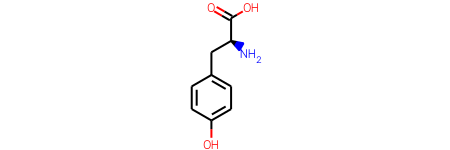

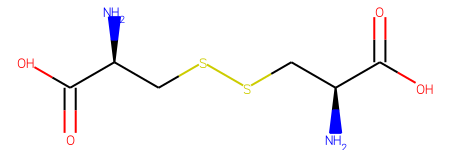

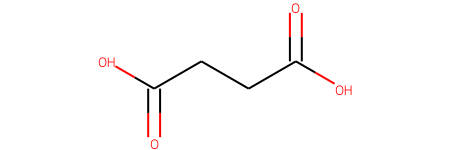

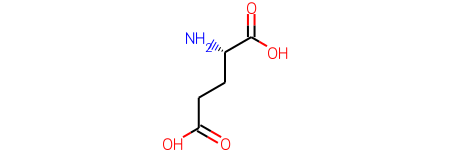

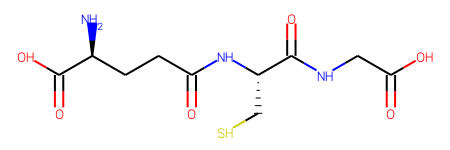

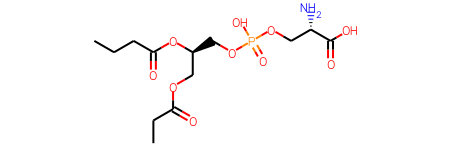

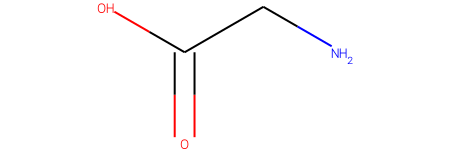

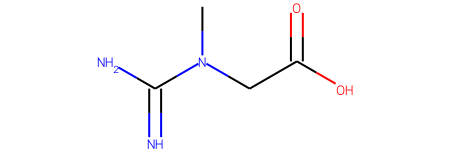

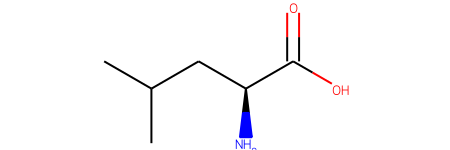

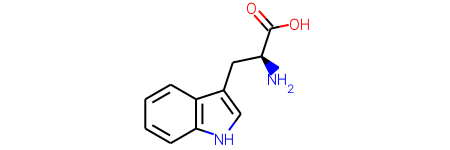

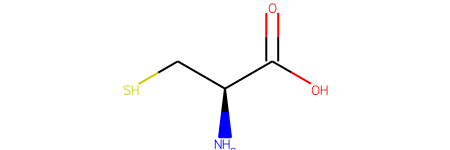

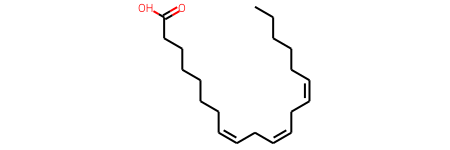

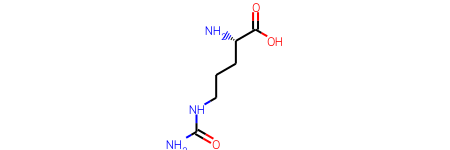

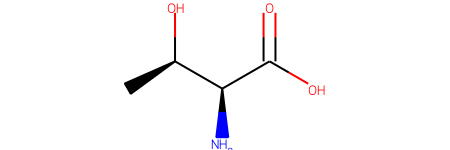

In [26]:
for i in aspirin_potential_superstructures[:30]:
    display(drugbank[i])

#### Ukol 4: Nyni vygenerujeme MACCS (Molecular ACCess System) klic pro aspirin a drugbank.  Provedeme vyhledavani pro aspirin jako v minulych krocich, ale s MACCS klicem.

In [31]:
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugbank]
aspirin_maccs = MACCSkeys.GenMACCSKeys(aspirin)

In [46]:
aspirin_maccs_hits = [i for i, key in enumerate(drugbank_maccs) if key == aspirin_maccs]
print(aspirin_maccs_hits)

[824]


Vratilo nam to jenom aspirin, coz ma tak byt.

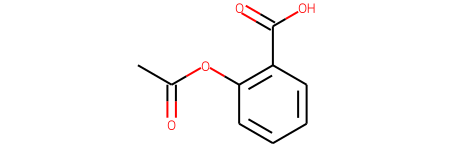

In [47]:
display(drugbank[aspirin_maccs_hits[0]])

Nyni delame opet ulohu s preprocessingem pri substrukturnim vyhledavani.

In [49]:
def potential_maccs_superstructure(super_key, query_key):
    for on_bit in query_key.GetOnBits():
        if not super_key.GetBit(on_bit):
            return False
    return True

In [53]:
aspirin_maccs_potential_substructures = [i for i, key in enumerate(drugbank_maccs) if potential_maccs_superstructure(key,aspirin_maccs)]
print(len(aspirin_maccs_potential_subs))

108


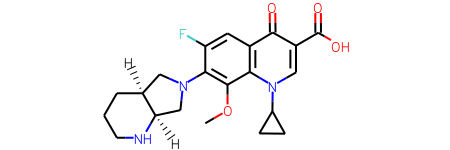

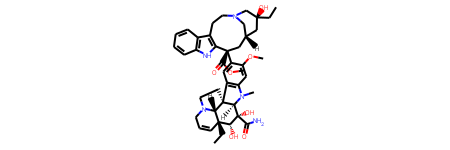

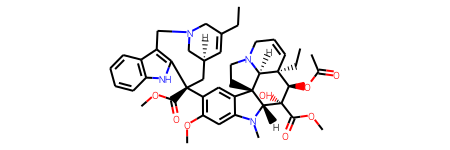

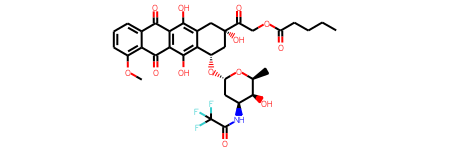

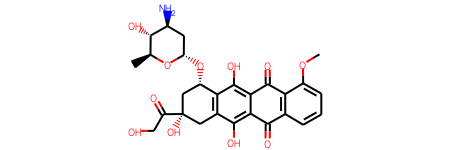

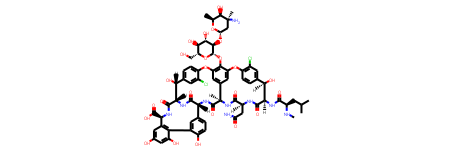

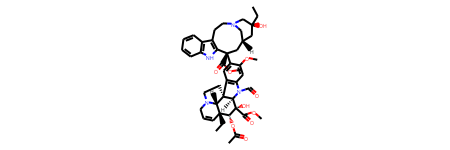

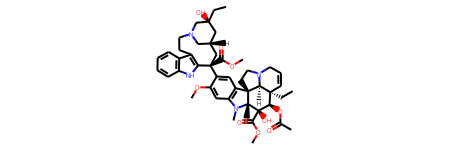

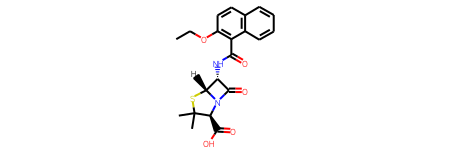

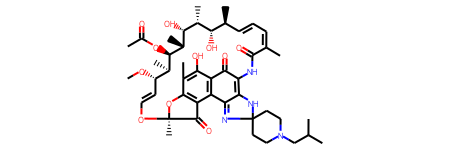

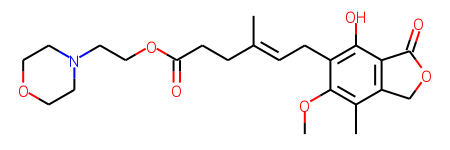

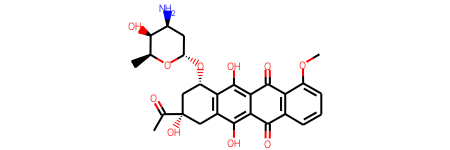

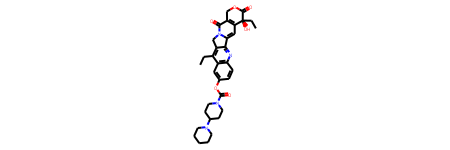

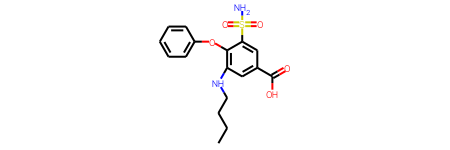

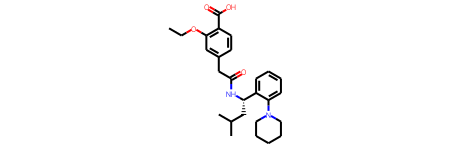

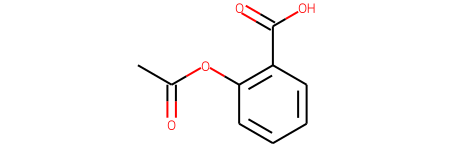

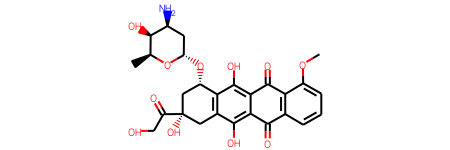

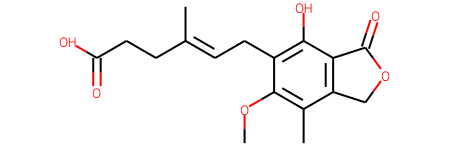

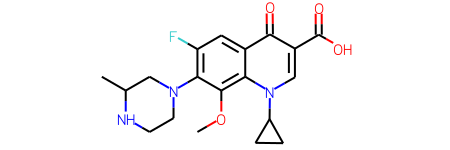

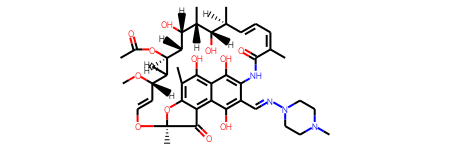

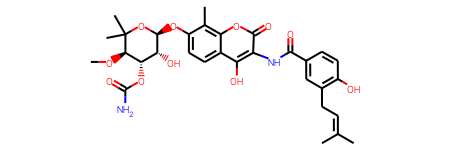

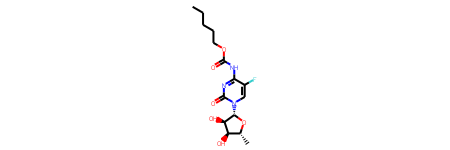

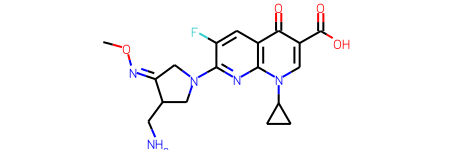

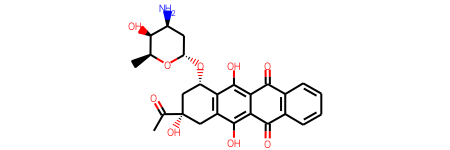

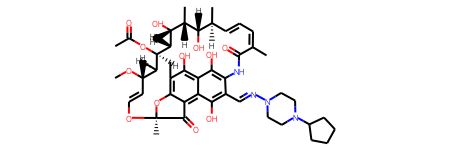

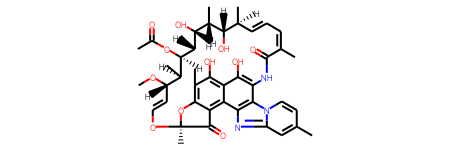

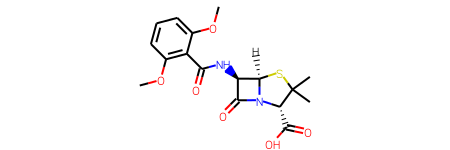

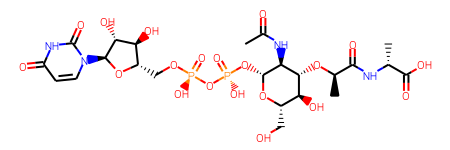

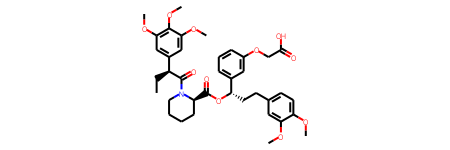

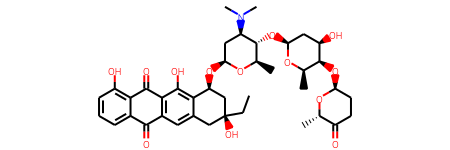

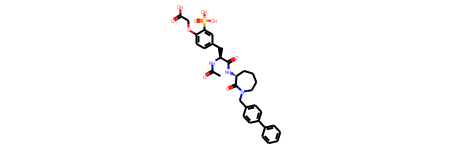

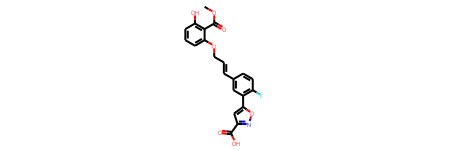

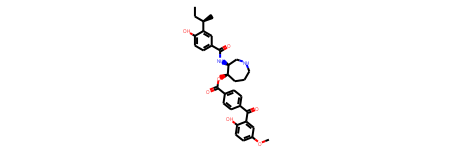

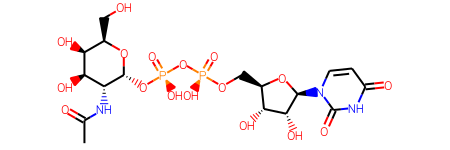

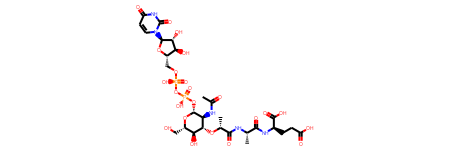

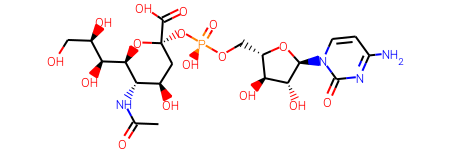

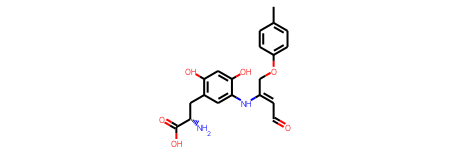

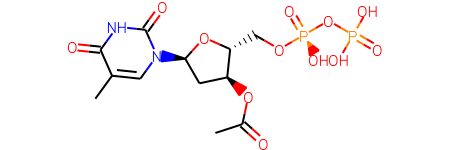

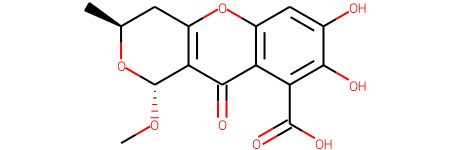

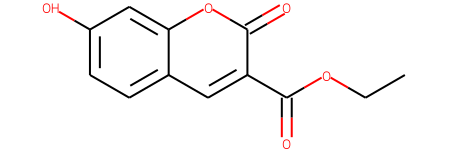

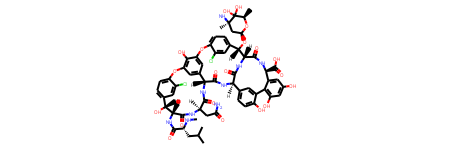

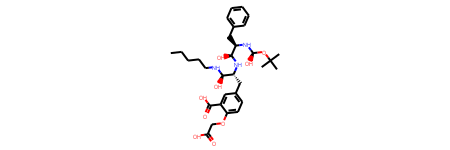

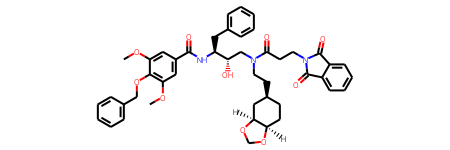

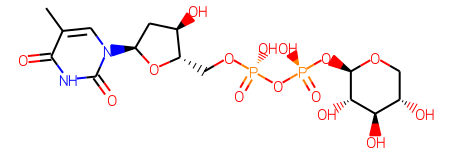

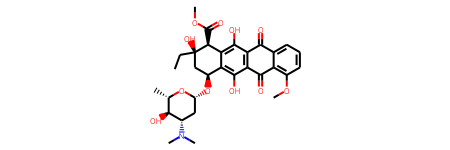

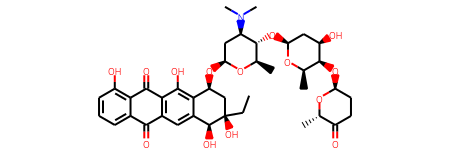

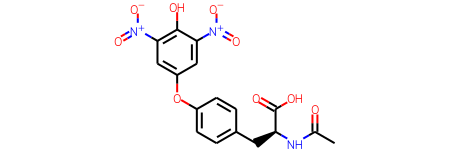

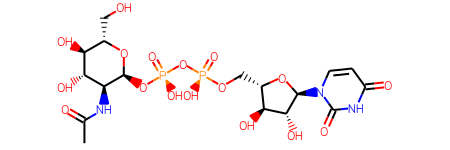

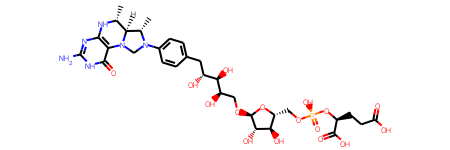

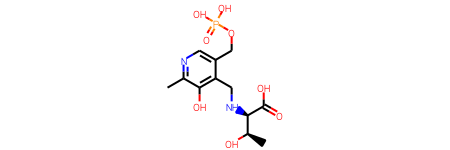

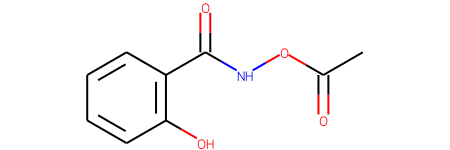

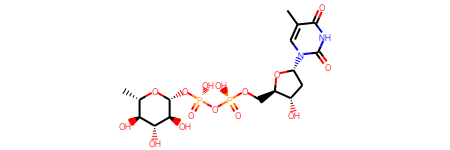

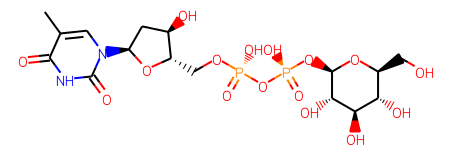

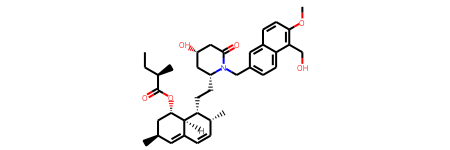

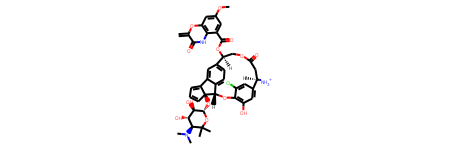

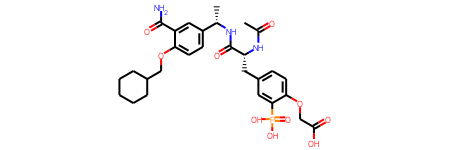

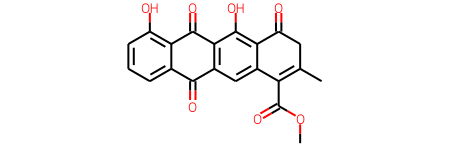

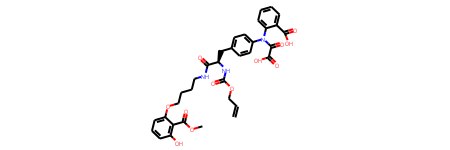

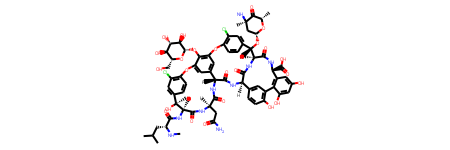

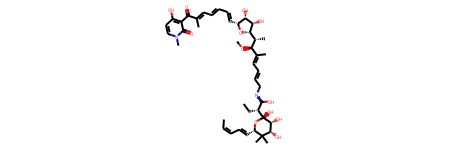

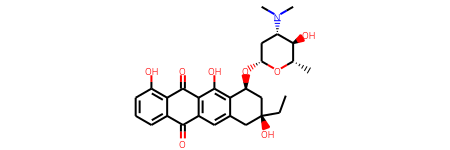

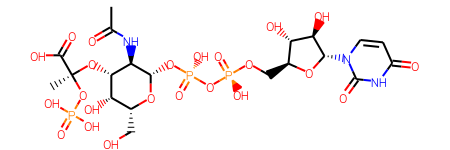

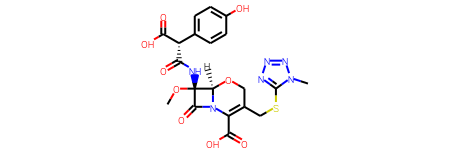

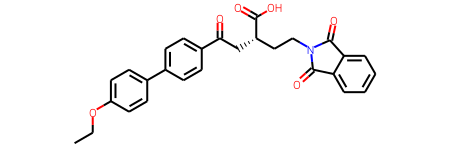

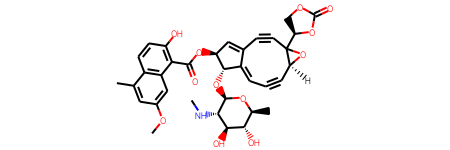

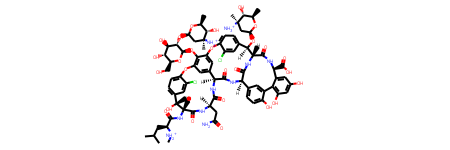

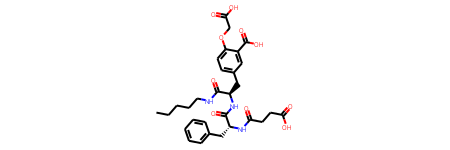

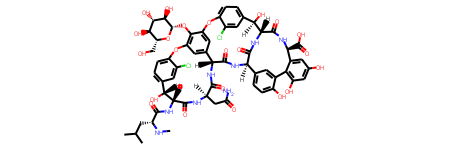

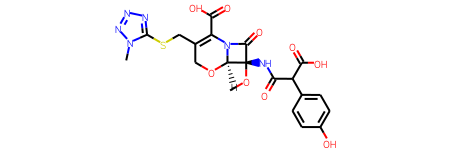

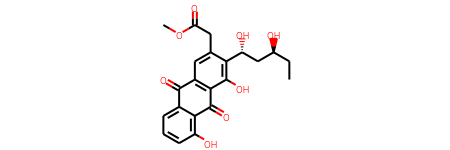

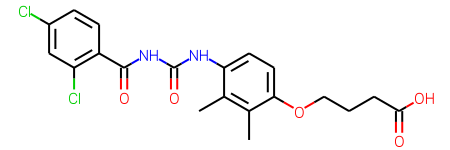

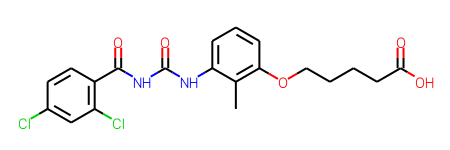

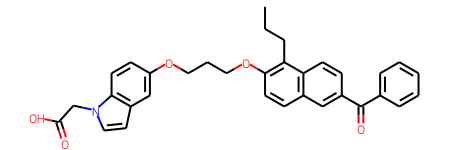

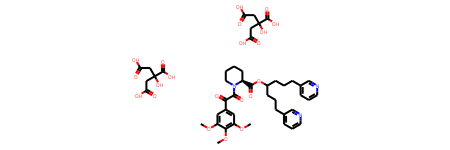

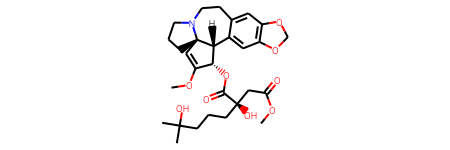

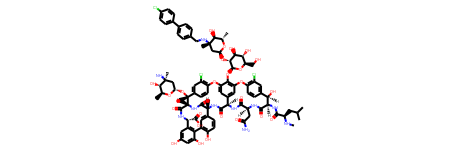

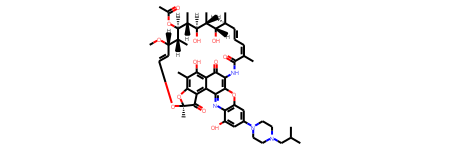

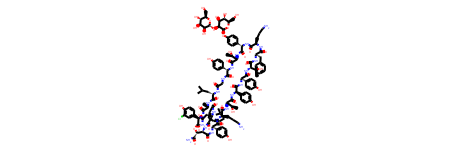

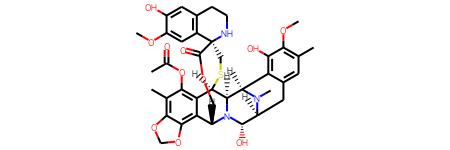

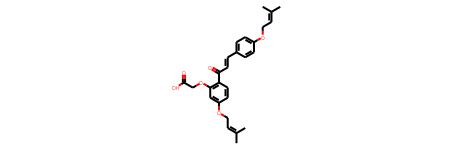

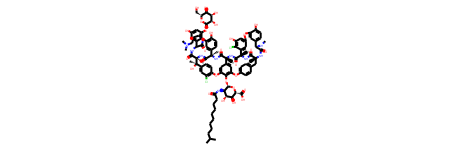

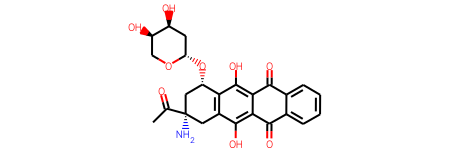

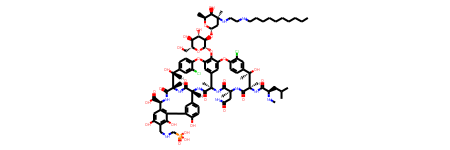

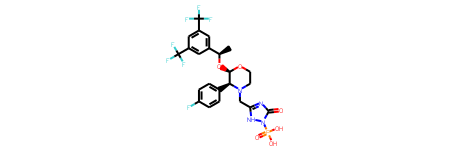

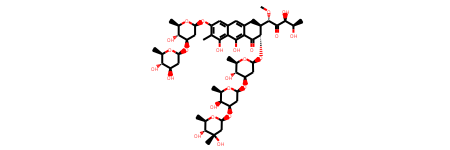

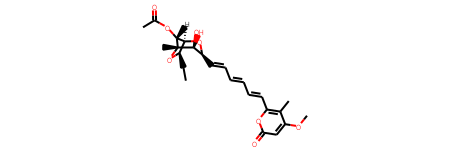

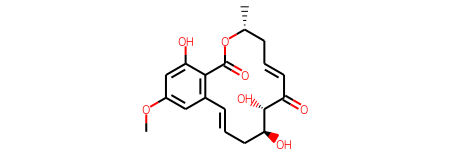

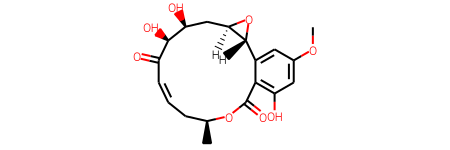

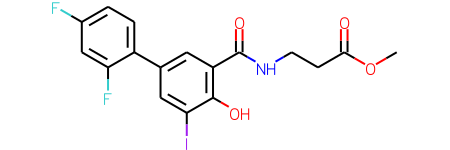

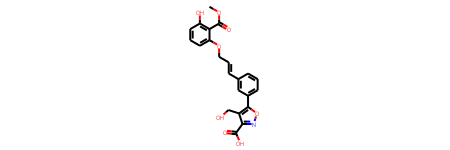

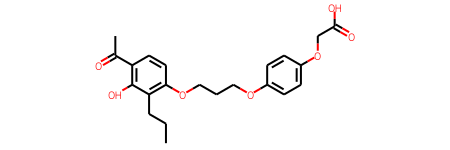

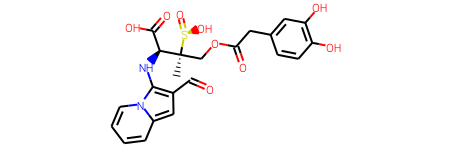

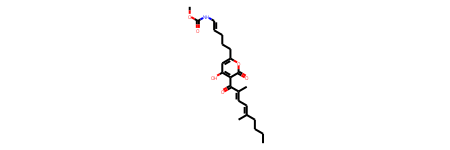

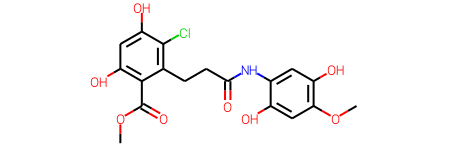

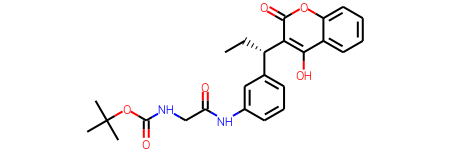

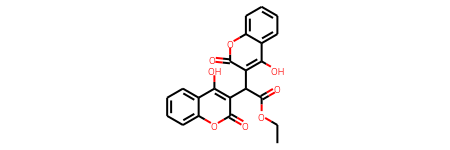

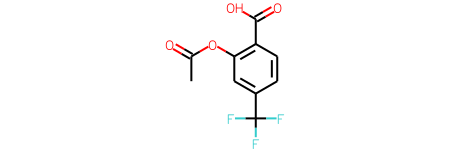

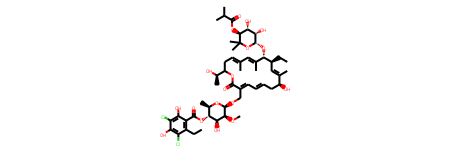

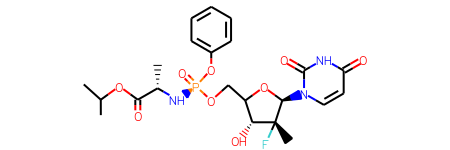

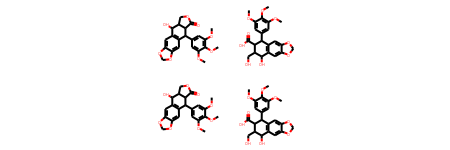

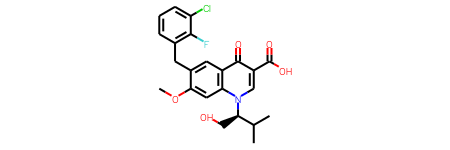

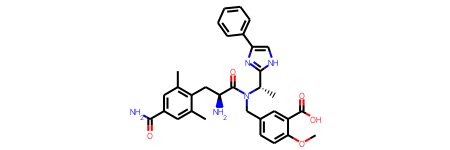

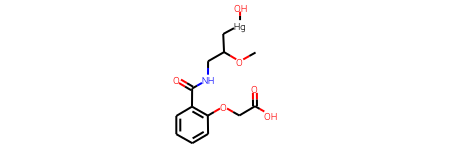

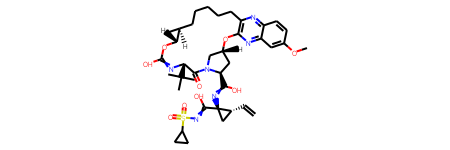

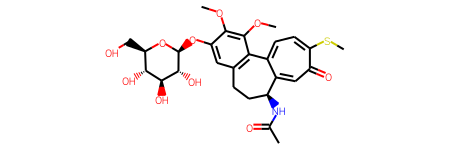

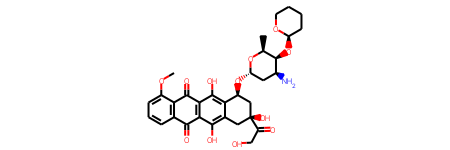

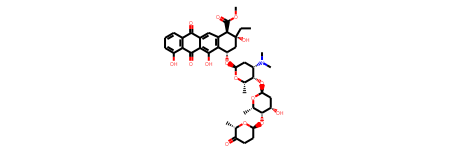

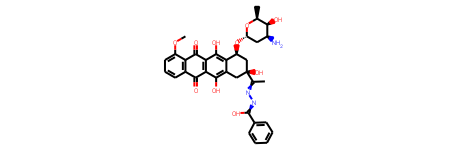

In [55]:
for i in aspirin_maccs_potential_substructures:
    display(drugbank[i])